# Wiener Stochastic Process

Gaussian Probability Diffusion over Twelve Time Steps

Portfolio of 10 Names 

Replace the multiple array structure of the single name FP model with a pandas dataframe

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats  import invgauss
from random import random

Initialize model parameters
Note:  feel free to change these parameter values and watch the graph change
    
* mu is the drift term
* dt is the time step
*  sigma is the standard deviation
*  S, dS, and density are random Gaussian values with paramterers N(0, dt)


In [80]:
mu =  0.00500 
sigma =  0.00500 
dt = 1
S0 = 1


Initialize the data by declaring arrays and filling the first element in the array

In [81]:

#create a big array of nones to hold our data
w,h = 40, 10
array = [[None] * w for i in range(h)]

#set up the column headings
columns = []
for i in range(10):
    columns.append('Time' + str(i))
    columns.append('density' + str(i))
    columns.append('dS' + str(i))
    columns.append('S' + str(i))

#set up the indexes
index = []
for i  in range (h):
    index.append(str(i))

#create a dataframe based on the columns and indices
df = pd.DataFrame(array, columns=columns, index=index)

#intialize first row
first_row = [0, 0,0,S0] * 10

df.loc[0] = first_row



Add the second element in the array containing the initial value of the density

In [82]:
t1 = dt
density1 = 0.00500 
dS1 = S0 * density1
S1 = S0 + dS1

#initialize the second row
second_row = [t1, density1, dS1, S1] * 10

df.loc[1] = second_row


Next we loop through the remaining time steps, adding to the arrays

In [83]:
for i in range(2, 12):
    prev_iter = df.loc[i-1]
    #print(prev_iter)
    
    new_row = []
    
    for j in range(10):
        prev_index = str(j)
        time_hash = "Time" + prev_index
        density_hash = "density" + prev_index 
        dS_hash = "dS" + prev_index
        S_hash = "S" + prev_index
    
        new_time = prev_iter[time_hash] + dt
        randvar = invgauss.rvs(mu=random(), loc=0 ,scale=dt)
        walk = mu * dt + sigma * randvar
        new_density = walk
        new_dS = prev_iter[dS_hash] + new_density
        new_S = prev_iter[S_hash] + new_dS
        
        new_row.append(new_time)
        new_row.append(new_density)
        new_row.append(new_dS)
        new_row.append(new_S)
        
    df.loc[i] = new_row


Now take a look at the values

In [84]:

print(df)

   Time0    density0        dS0       S0 Time1    density1        dS1  \
0   None        None       None     None  None        None       None   
1   None        None       None     None  None        None       None   
2   None        None       None     None  None        None       None   
3   None        None       None     None  None        None       None   
4   None        None       None     None  None        None       None   
5   None        None       None     None  None        None       None   
6   None        None       None     None  None        None       None   
7   None        None       None     None  None        None       None   
8   None        None       None     None  None        None       None   
9   None        None       None     None  None        None       None   
0      0           0          0        1     0           0          0   
1      1       0.005      0.005    1.005     1       0.005      0.005   
2      2  0.00679657  0.0117966   1.0168     2  0.0

Finally generate the plot

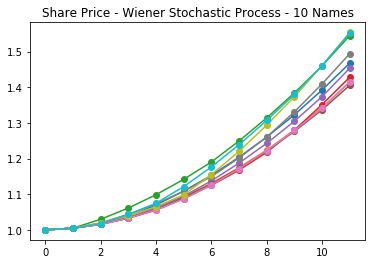

In [85]:
x = df["Time0"]

for i in range(10):
    hash = "S" + str(i)
    plt.plot(x,df[hash], marker='o', linestyle='solid')

plt.title("Share Price - Wiener Stochastic Process - 10 Names")
plt.show()